Import seluruh file dan Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Load the Dataset

In [2]:
data = pd.read_csv("/tmp/supermarket_sales - Sheet1.csv")
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Terdapat 1000 data dengan 17 columns

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()

Diatas untuk membagi tanggal menjadi Tahun, bulan, dan hari

# Explanatory Data Analysis

Mencek apakah terdapat data yang bernilai NULL:

In [4]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
year                       0
month                      0
day                        0
dtype: int64

Tidak ada data yang bernilai NULL

Mengecek deskripsi statistik pada dataset:

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,2019.0,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.0,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,2019.0,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,2019.0,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2019.0,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,2019.0,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,2019.0,3.000000


Mengecek informasi dataset:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Mengecek apakah variabel atau fitur gross income berisi missing value:

In [7]:
gi = (data['gross income'] == 0).sum()
print(gi)

0


# Univariate Analysis

Membagi fitur numerik dan kategorikal pada dataset:

In [8]:
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'year', 'month']
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment', 'day']


   jumlah sampel  persentase
A            340        34.0
B            332        33.2
C            328        32.8


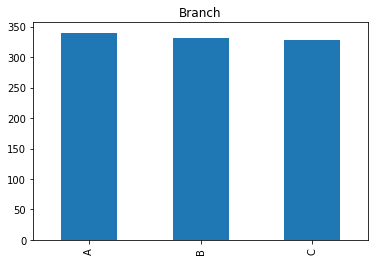

In [9]:
#categorical fitur Branch
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Yangon               340        34.0
Mandalay             332        33.2
Naypyitaw            328        32.8


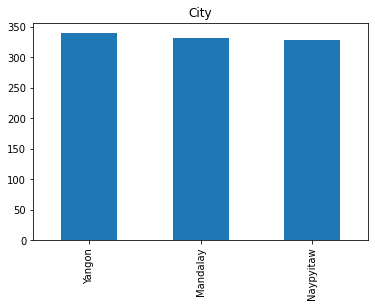

In [10]:
#categorical fitur City
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Member            501        50.1
Normal            499        49.9


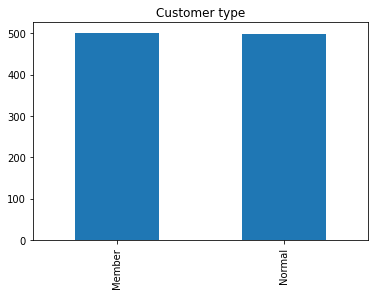

In [11]:
#categorical fitur Customer type
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Female            501        50.1
Male              499        49.9


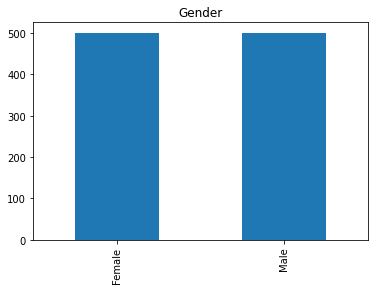

In [12]:
#categorical fitur Gender
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                        jumlah sampel  persentase
Fashion accessories               178        17.8
Food and beverages                174        17.4
Electronic accessories            170        17.0
Sports and travel                 166        16.6
Home and lifestyle                160        16.0
Health and beauty                 152        15.2


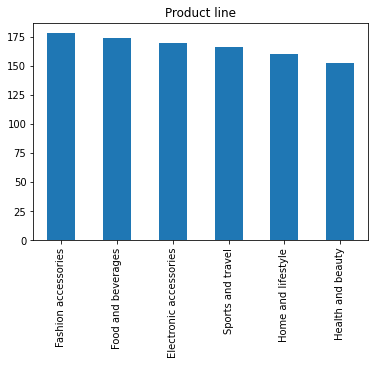

In [13]:
#categorical fitur Product line
feature = categorical_features[4]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
19:48              7         0.7
14:42              7         0.7
17:38              6         0.6
17:16              5         0.5
11:40              5         0.5
...              ...         ...
13:26              1         0.1
11:17              1         0.1
14:57              1         0.1
17:53              1         0.1
19:12              1         0.1

[506 rows x 2 columns]


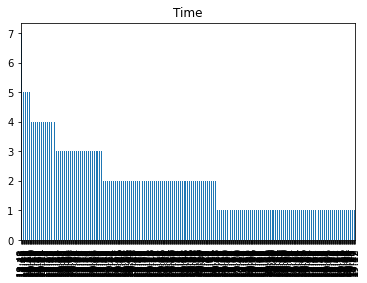

In [14]:
#categorical fitur Time
feature = categorical_features[5]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

             jumlah sampel  persentase
Ewallet                345        34.5
Cash                   344        34.4
Credit card            311        31.1


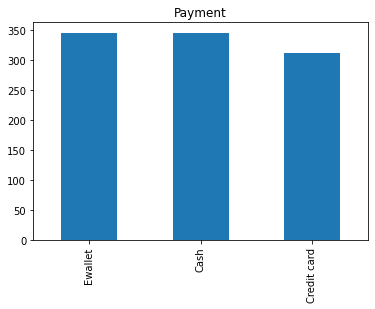

In [15]:
#categorical fitur Payment
feature = categorical_features[6]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Saturday             164        16.4
Tuesday              158        15.8
Wednesday            143        14.3
Friday               139        13.9
Thursday             138        13.8
Sunday               133        13.3
Monday               125        12.5


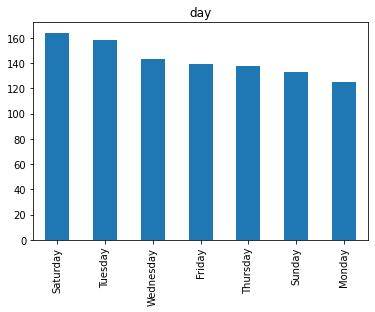

In [16]:
#categorical fitur day
feature = categorical_features[7]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

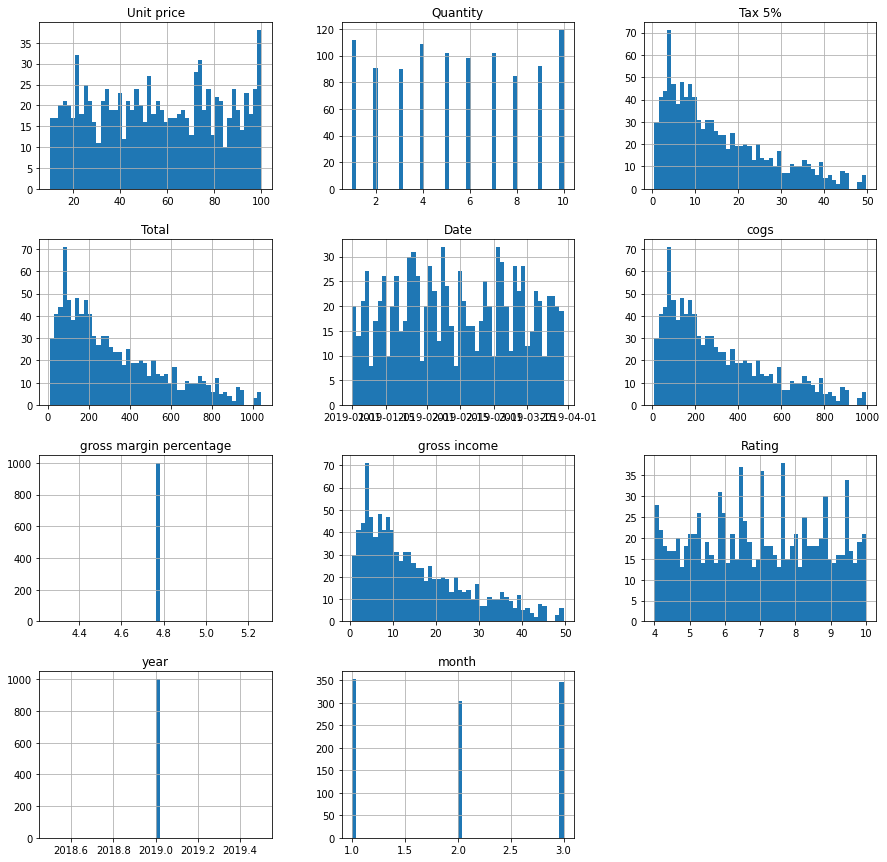

In [17]:
#Numeric Fitur
data.hist(bins=50, figsize=(15,15))
plt.show()

Yang menjadi target analisis ialah variabel "gross income"
Pada histogram "gross income" terdapat informasi mengenai peningkatan pendapatan kotor sebanding dengan penurunan jumlah sampel.

# Multivariate Analysis

Mengecek rata-rata Pendapatan kotor terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap pendapatan kotor:

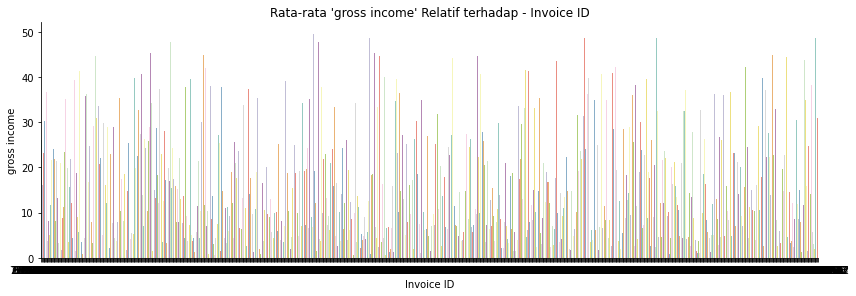

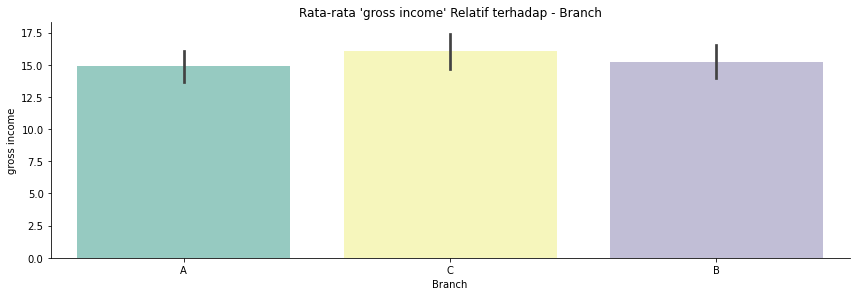

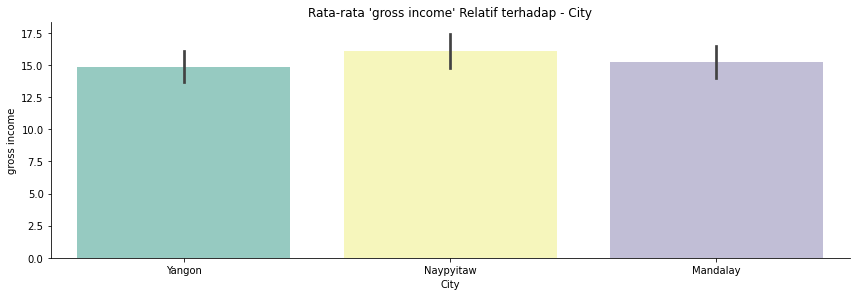

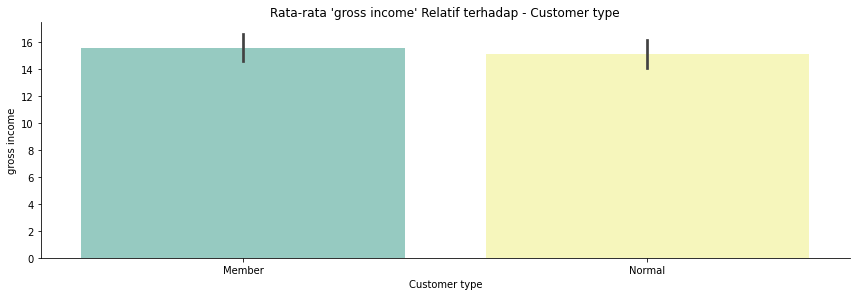

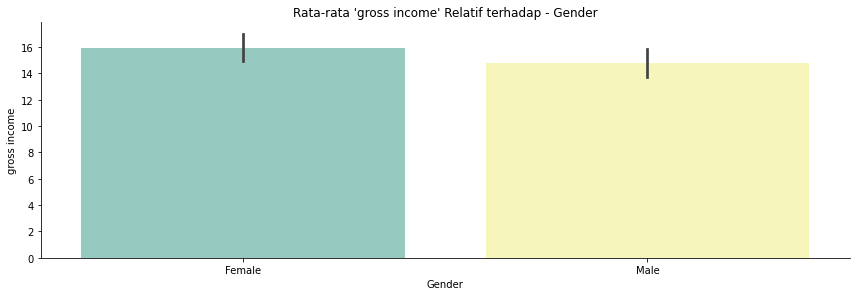

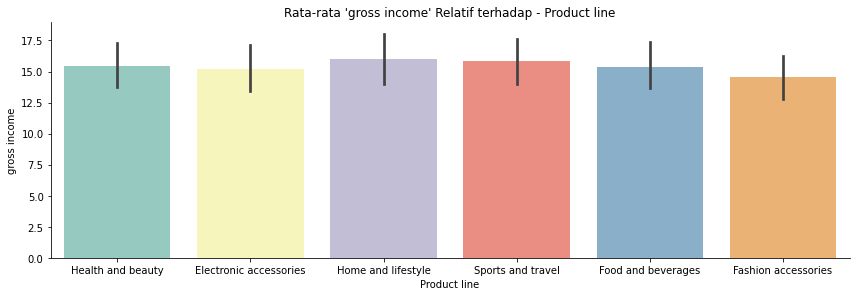

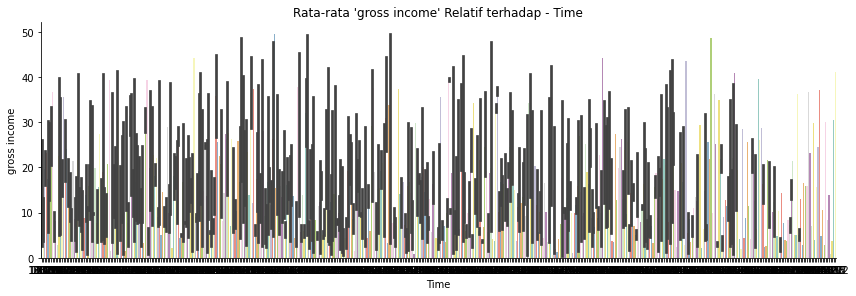

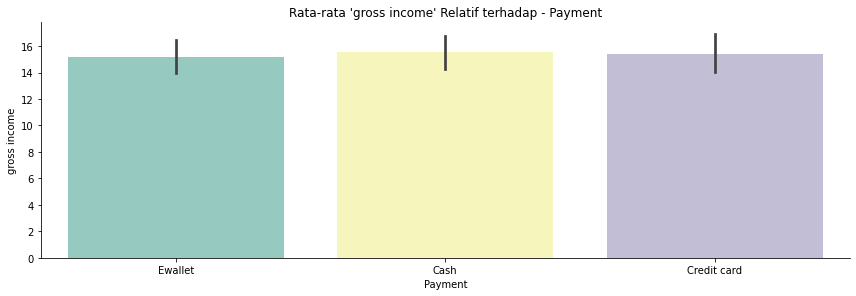

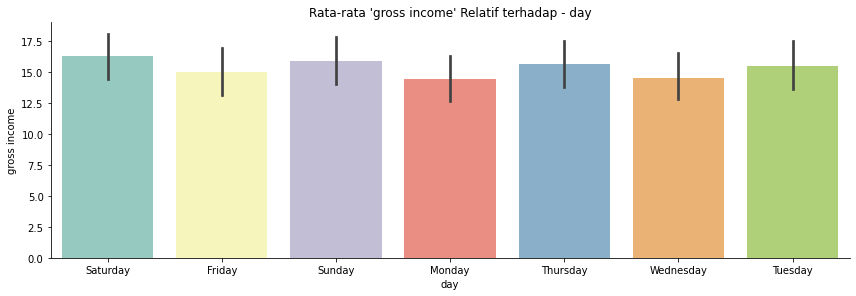

In [18]:
#categorical fitur
cat_features = data.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="gross income", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'gross income' Relatif terhadap - {}".format(col))

Dapat dilihat bahwa rata-rata seluruh fitur tidak memiliki dampak yang besar terhadap gross income atau pendapatan kotor

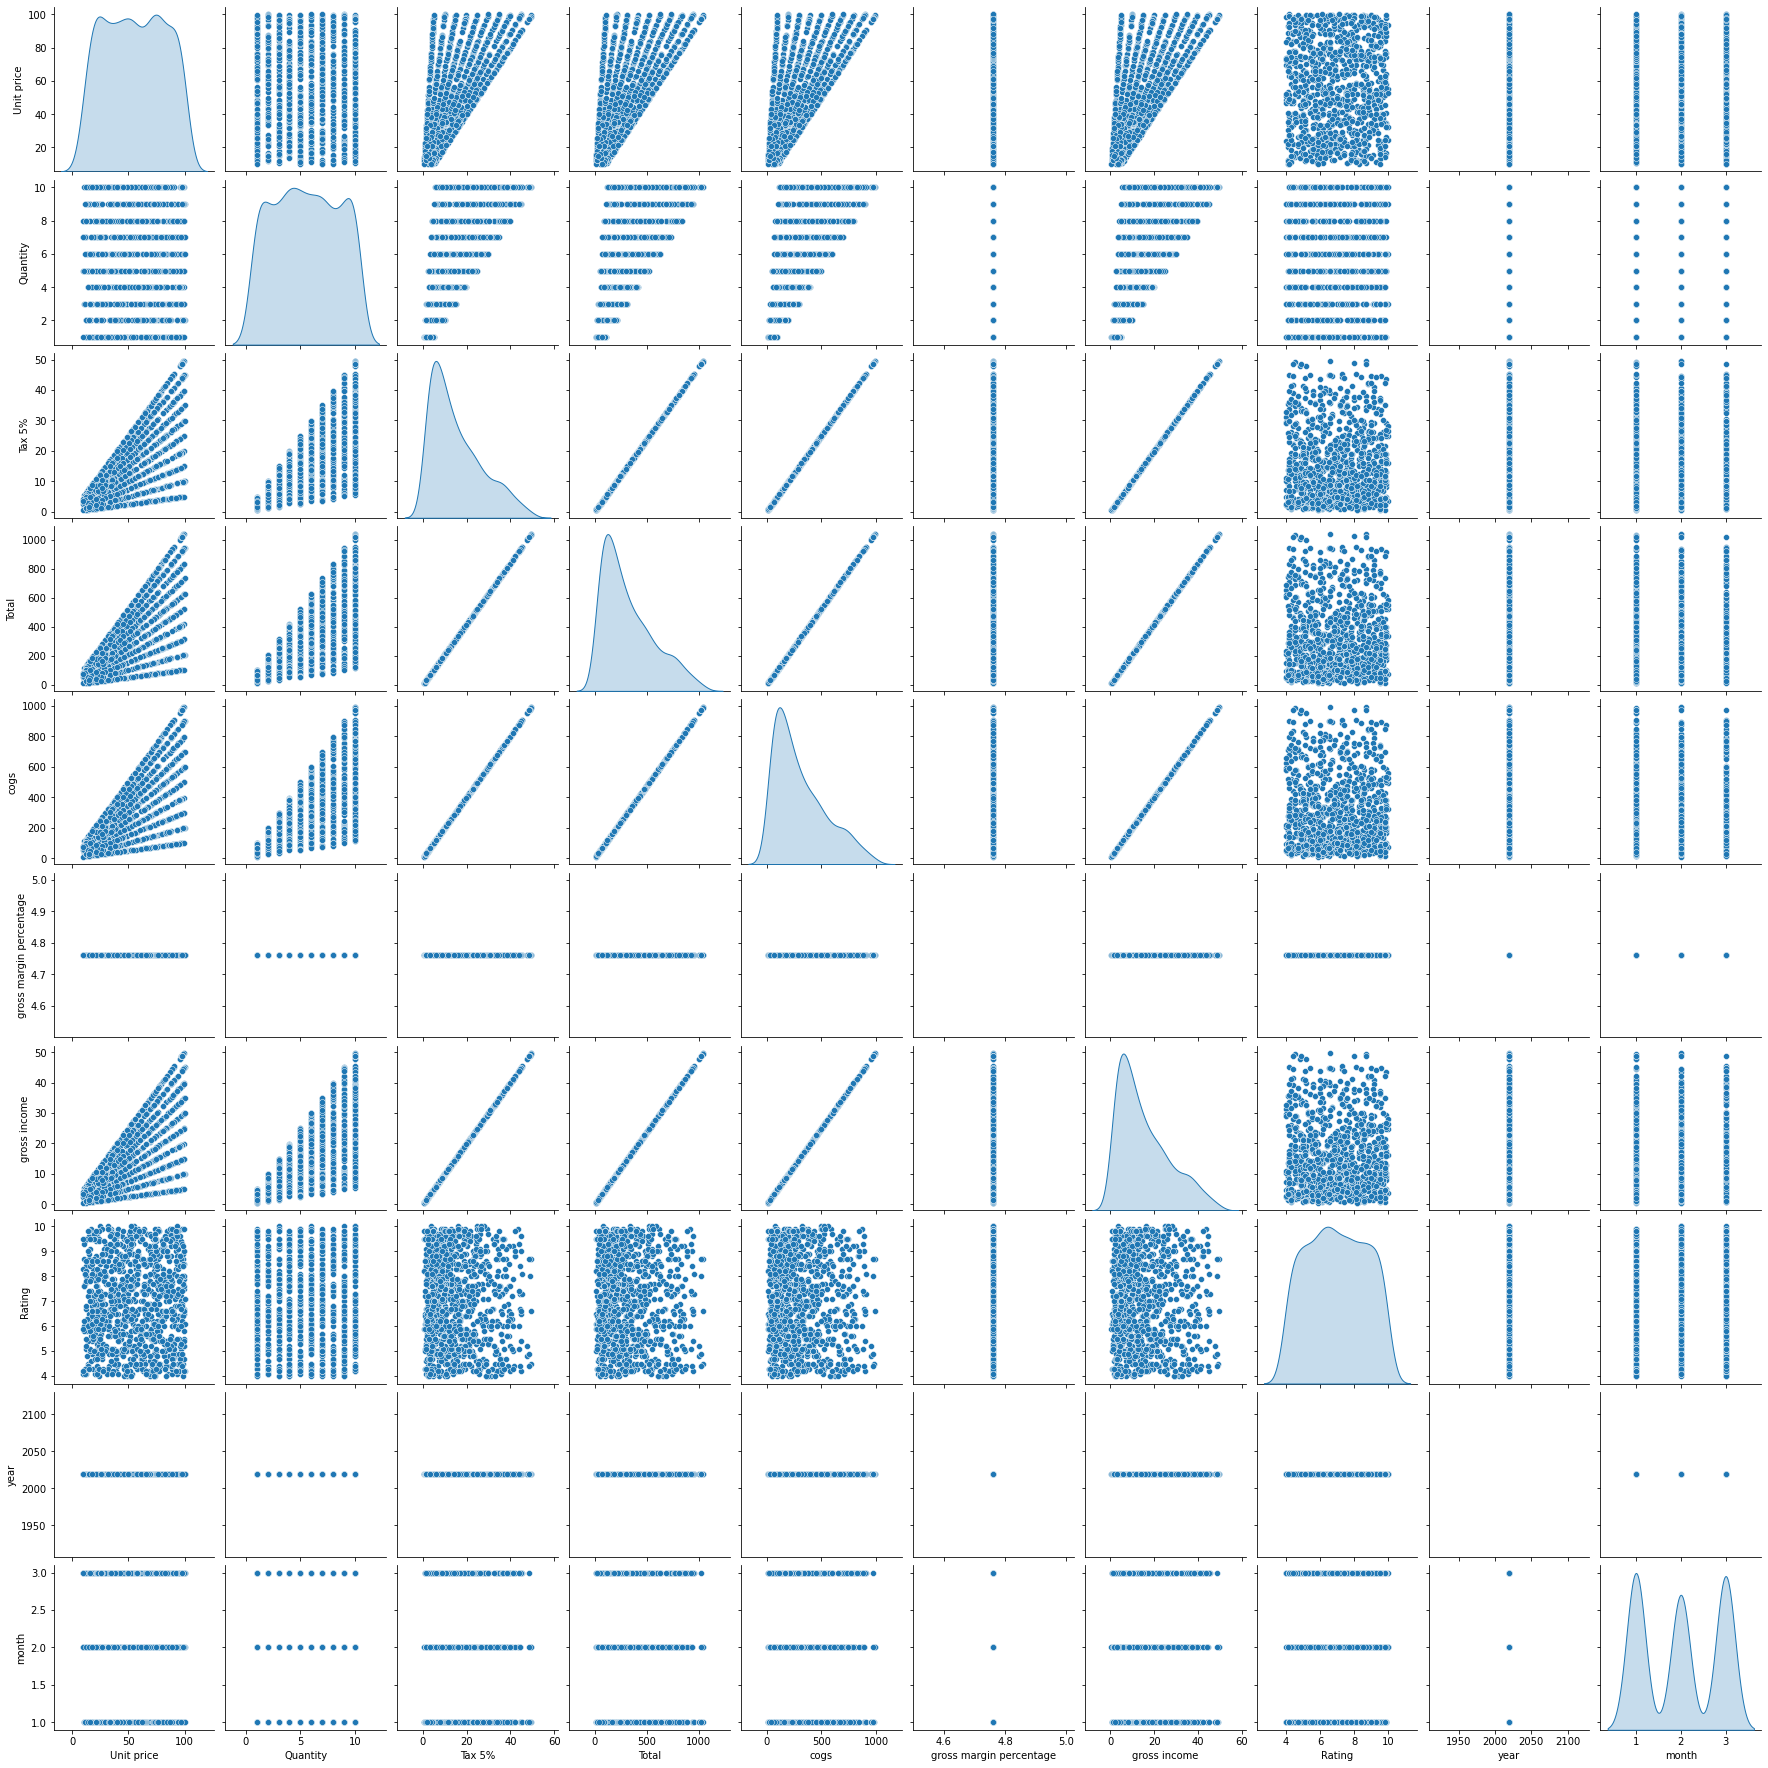

In [19]:
#Numeric fitur
sns.pairplot(data, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

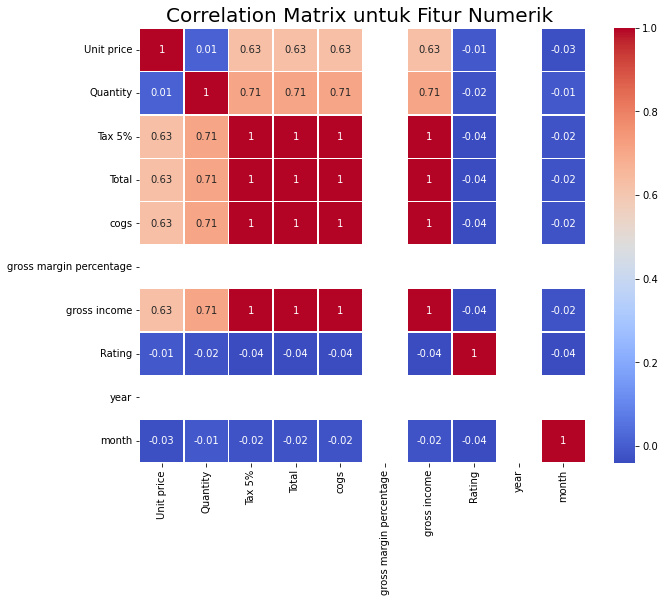

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

Encoding fitur kategori menggunakan One-hot-encoding:

In [21]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['Branch'], prefix='Branch')],axis=1)
data = pd.concat([data, pd.get_dummies(data['City'], prefix='City')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Customer type'], prefix='Customer type')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Gender'], prefix='Gender')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Product line'], prefix='Product line')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Time'], prefix='Time')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Payment'], prefix='Payment')],axis=1)
data = pd.concat([data, pd.get_dummies(data['day'], prefix='day')],axis=1)
data.drop(['Branch','City','Customer type', 'Gender', 'Product line', 'Time', 'Payment', 'day'], axis=1, inplace=True)
data.head()

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,...,Payment_Cash,Payment_Credit card,Payment_Ewallet,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,750-67-8428,74.69,7,26.1415,548.9715,2019-01-05,522.83,4.761905,26.1415,9.1,...,0,0,1,0,0,1,0,0,0,0
1,226-31-3081,15.28,5,3.8200,80.2200,2019-03-08,76.40,4.761905,3.8200,9.6,...,1,0,0,1,0,0,0,0,0,0
2,631-41-3108,46.33,7,16.2155,340.5255,2019-03-03,324.31,4.761905,16.2155,7.4,...,0,1,0,0,0,0,1,0,0,0
3,123-19-1176,58.22,8,23.2880,489.0480,2019-01-27,465.76,4.761905,23.2880,8.4,...,0,0,1,0,0,0,1,0,0,0
4,373-73-7910,86.31,7,30.2085,634.3785,2019-02-08,604.17,4.761905,30.2085,5.3,...,0,0,1,1,0,0,0,0,0,0


Kolom Tax, Total, dan cogs yang memiliki korelasi yang tinggi sehingga perlu melakukan Reduksi Dimensi dengan PCA:

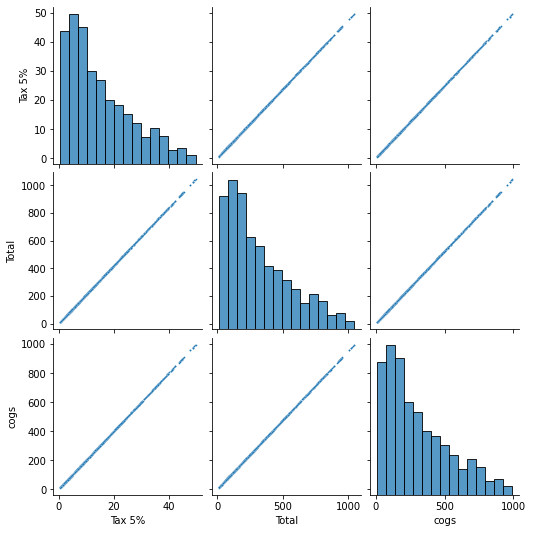

In [22]:
sns.pairplot(data[['Tax 5%','Total','cogs']], plot_kws={"s": 3});

In [23]:
pca = PCA(n_components=3, random_state=123)
pca.fit(data[['Tax 5%','Total','cogs']])
princ_comp = pca.transform(data[['Tax 5%','Total','cogs']])

In [24]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

Membagi data train dan data test:

In [25]:
X = data.drop(["gross income", "Date", "Invoice ID"],axis =1)
y = data["gross income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
data

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating,...,Payment_Cash,Payment_Credit card,Payment_Ewallet,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,750-67-8428,74.69,7,26.1415,548.9715,2019-01-05,522.83,4.761905,26.1415,9.1,...,0,0,1,0,0,1,0,0,0,0
1,226-31-3081,15.28,5,3.8200,80.2200,2019-03-08,76.40,4.761905,3.8200,9.6,...,1,0,0,1,0,0,0,0,0,0
2,631-41-3108,46.33,7,16.2155,340.5255,2019-03-03,324.31,4.761905,16.2155,7.4,...,0,1,0,0,0,0,1,0,0,0
3,123-19-1176,58.22,8,23.2880,489.0480,2019-01-27,465.76,4.761905,23.2880,8.4,...,0,0,1,0,0,0,1,0,0,0
4,373-73-7910,86.31,7,30.2085,634.3785,2019-02-08,604.17,4.761905,30.2085,5.3,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,40.35,1,2.0175,42.3675,2019-01-29,40.35,4.761905,2.0175,6.2,...,0,0,1,0,0,0,0,0,1,0
996,303-96-2227,97.38,10,48.6900,1022.4900,2019-03-02,973.80,4.761905,48.6900,4.4,...,0,0,1,0,0,1,0,0,0,0
997,727-02-1313,31.84,1,1.5920,33.4320,2019-02-09,31.84,4.761905,1.5920,7.7,...,1,0,0,0,0,1,0,0,0,0
998,347-56-2442,65.82,1,3.2910,69.1110,2019-02-22,65.82,4.761905,3.2910,4.1,...,1,0,0,1,0,0,0,0,0,0


In [27]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


# Standarisasi

In [28]:
numerical_features = ['Unit price', 'Quantity', 'Tax 5%','Total','cogs']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Unit price,Quantity,Tax 5%,Total,cogs
687,0.286138,1.532725,1.402162,1.402162,1.402162
500,0.681682,-1.533577,-1.003959,-1.003959,-1.003959
332,0.797572,-0.170776,0.328976,0.328976,0.328976
979,0.446104,-1.533577,-1.030521,-1.030521,-1.030521
817,-0.841599,0.851325,-0.159677,-0.159677,-0.159677


In [29]:
X_train[numerical_features].describe().round(4)

,Unit price,Quantity,Tax 5%,Total,cogs
count,800.0000,800.0000,800.0000,800.0000,800.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0006,1.0006,1.0006,1.0006,1.0006
min,-1.7459,-1.5336,-1.2773,-1.2773,-1.2773
25%,-0.8628,-0.8522,-0.8079,-0.8079,-0.8079
50%,-0.0304,-0.1708,-0.2632,-0.2632,-0.2632
75%,0.8473,0.8513,0.5968,0.5968,0.5968
max,1.6692,1.5327,2.9333,2.9333,2.9333


# Modelling

In [30]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [31]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [32]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [33]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Model Evaluation

Scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1:

In [34]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Mengevaluasi ketiga model:

In [35]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.003591,0.004173
RF,0.000001,0.000004
Boosting,0.00142,0.001371


visualisasi metrik MSE:

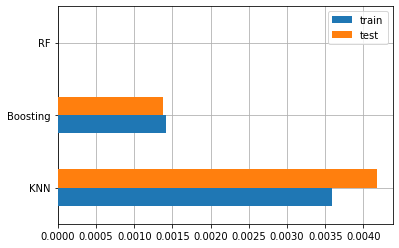

In [36]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [42]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
993,8.7450,9.5,8.7,7.7
859,21.4335,18.9,21.5,22.8
298,12.0020,11.5,12.0,12.7
553,6.6630,8.8,6.7,7.7
672,11.0115,10.0,11.1,12.6
